In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

Использование алгоритмов понижения размерности для улучшения классификации новостей (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

Цель задания: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Датасет: Набор данных новостных статей (датасет '20 Newsgroups' доступный в `sklearn.datasets`).

Задачи:

1. Загрузите датасет '20 Newsgroups' из sklearn.


In [189]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc",
    "comp.os.ms-windows.misc",
]
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc",
    "comp.os.ms-windows.misc",
]
data_train = fetch_20newsgroups(subset='train', categories=categories)
y_train = data_train.target
data_test = fetch_20newsgroups(subset='test', categories=categories)
y_test = data_test.target
len(list(data_train.target_names))


20

In [190]:
len(data_train.data)

11314

In [191]:
data_train.data[1:5]

["From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n",
 'From: twillis@ec.ecn.purdue.edu (Thomas E Willis)\nSubject: PB questions...\nOrganization: Purdue University Engine

2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).


In [192]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)

In [193]:
X_train.shape

(11314, 56121)

#### после векторизации получаем данные для тренировки размерностью 56121

In [194]:
X_test.shape

(7532, 56121)

#### после векторизации получаем данные для ТЕСТа размерностью 41432

3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:
   - PCA (Principal Component Analysis)
   - t-SNE (t-distributed Stochastic Neighbor Embedding)
   - UMAP (Uniform Manifold Approximation and Projection)


In [195]:
# далее будем проверять и показывать 2 мерные проекции
# n_components = len(list(data_train.target_names))
n_components = 2

In [196]:
#   - PCA (Principal Component Analysis)
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(11314, 2)

In [197]:
# подготовка к визуализации
y_train_cat = [categories[n] for n in y_train]

# Присваиваем каждой категории уникальный цвет
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
color_dict = dict(zip(categories, colors))
# Создаем массив цветов для каждой точки в tsne_results
point_colors = [color_dict[cat] for cat in categories]
y_train_cat[:5]

['rec.motorcycles',
 'comp.windows.x',
 'comp.windows.x',
 'comp.graphics',
 'soc.religion.christian']

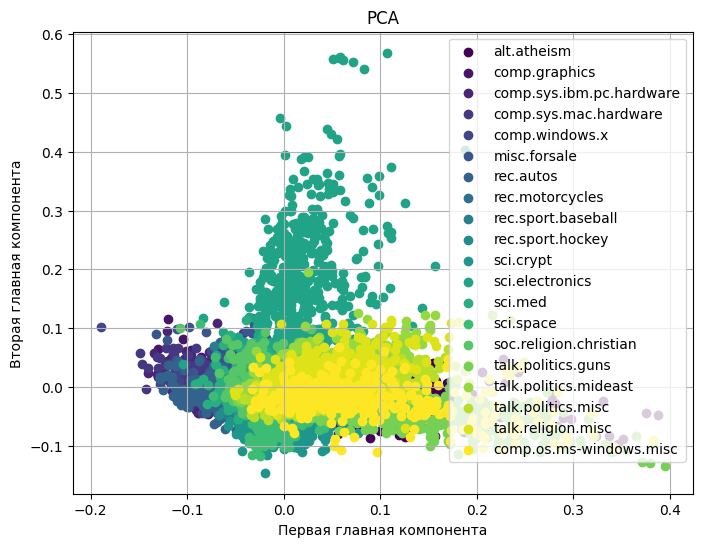

(2, 56121)


In [198]:
# визуализация результатов
plt.figure(figsize=(8, 6))
for cat, color in color_dict.items():
    idx = [ c == cat for c in y_train_cat]
    plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], c=[color], label=cat)
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.7)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA')
plt.legend()
plt.grid(True)
plt.show()

# вывод влияния признаков на компоненты
components = pca.components_
print(components.shape)

#### метод PCA плохо выделяет классы при проекции на компоненты

In [199]:
# Суммирование долей дисперсии для определения сохранённых данных
variance_retained = np.sum(pca.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до {n_components} компонент.")

Сохранено 0.68% данных после понижения размерности до 2 компонент.


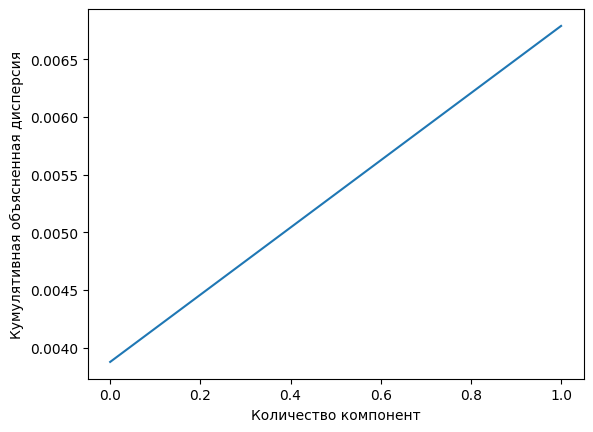

In [200]:
# Кумулятивная сумма объясненной дисперсии:  
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.show()

#### PCA сохраняет менее 1% данных при снижении размерности до 2

#### Для примера: PCA сохраняет всего 35% данных при снижении размерности до 500 
![alt text](500featuresPCA.png "Title")

#### Для примера: PCA сохраняет всего 72% данных при снижении размерности до 2000 
![alt text](2000featuresPCA.png "Title")

In [201]:
#   - TsnE (Principal Component Analysis)
tsne = TSNE(n_components=n_components, random_state=42, init="random")
X_train_tsne = tsne.fit_transform(X_train)
print(X_train_tsne.shape)
X_test_tsne = tsne.fit_transform(X_test)
print(X_test_tsne.shape)


(11314, 2)
(7532, 2)


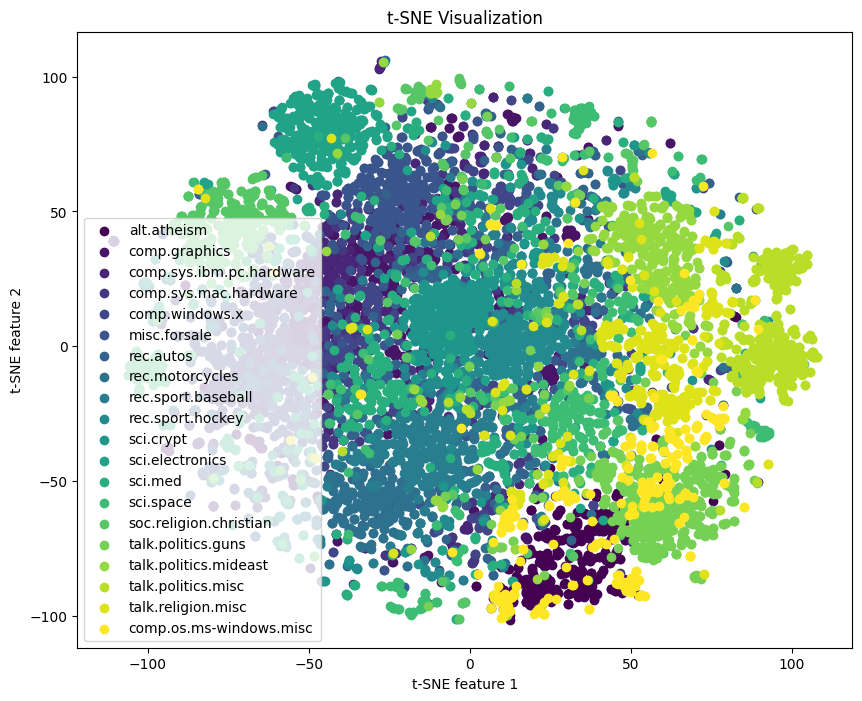

In [202]:
# Визуализация tNSE
plt.figure(figsize=(10, 8))
for cat, color in color_dict.items():
    idx = [ c == cat for c in y_train_cat]
    plt.scatter(X_train_tsne[idx, 0], X_train_tsne[idx, 1], c=[color], label=cat)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()

#### при распределении на 2 компоненты tSNE хорошо выделяет некоторые группы новостей 

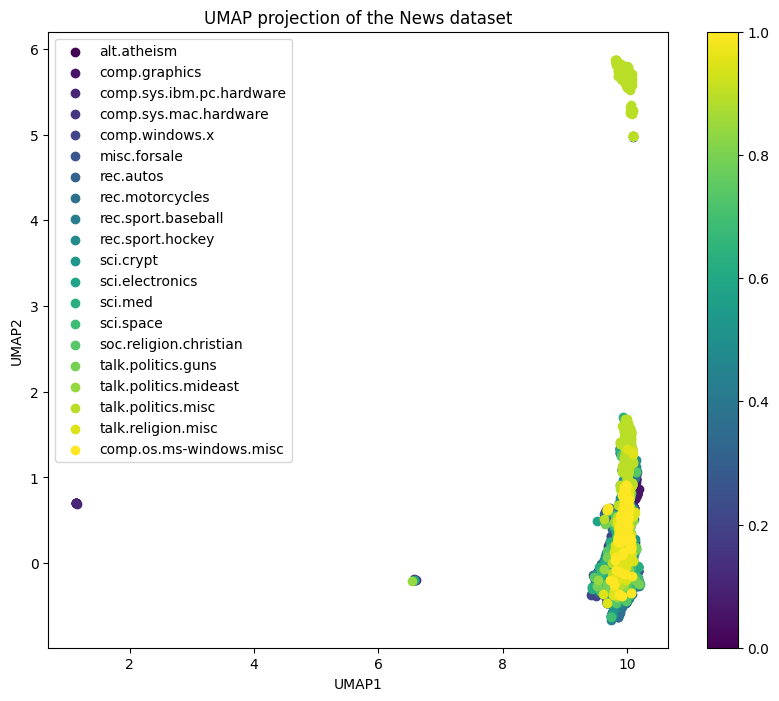

In [244]:
# уменьшение размерности с помощью UMAP
from umap import UMAP
umap = UMAP(n_components=n_components)
X_train_umap = umap.fit_transform(X_train)
X_test_umap = umap.transform(X_test)
# umap.plot.points(X_umap, labels=df['labels'])
# Визуализация
plt.figure(figsize=(10, 8))
for cat, color in color_dict.items():
    idx = [ c == cat for c in y_train_cat]
    plt.scatter(X_train_umap[idx, 0], X_train_umap[idx, 1], c=[color], label=cat)
# plt.scatter(X_train_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP projection of the News dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()





#### UMAP плохо выделяет классы при уменьшении размерности до 2. мы можем выделить лишь один класс, остальные сгруппированы (справа внизу)

In [241]:
# Применение LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2)
X_train_lle = lle.fit_transform(X_train.toarray())
print(X_train_lle)

[[-5.05757786e-05  6.30278147e-05]
 [-2.88973156e-05 -1.04655578e-03]
 [ 3.56796489e-05 -3.40506122e-03]
 ...
 [-8.73917598e-05 -2.08279825e-03]
 [ 3.50505754e-06  1.41814458e-04]
 [-9.88731001e-06  1.36458328e-04]]


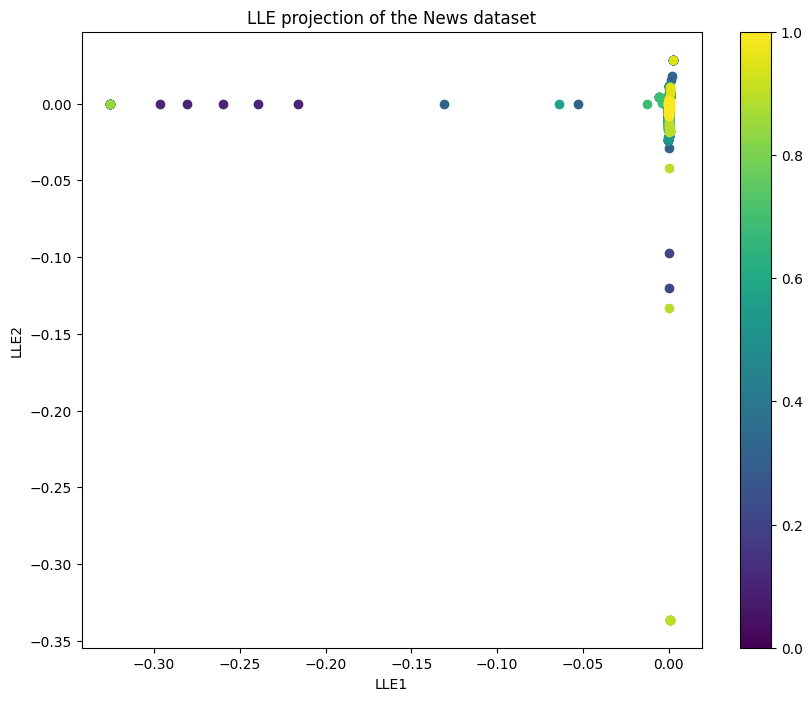

In [243]:
plt.figure(figsize=(10, 8))
for cat, color in color_dict.items():
    idx = [ c == cat for c in y_train_cat]
    plt.scatter(X_train_lle[idx, 0], X_train_lle[idx, 1], c=[color], label=cat)
# plt.scatter(X_train_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='viridis', s=5)
plt.colorbar()
plt.title('LLE projection of the News dataset')
plt.xlabel('LLE1')
plt.ylabel('LLE2')
# plt.legend()
plt.show()

#### LLE не дает нам представления о группировки классов в 2х мерном пространстве

#### Лучшим преобразованием (судя по картинкам) является tsne

4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.


In [205]:
# попробуем модель Логистической регрессии после векторизации БЕЗ ПОНИЖЕНИЯ размерности (train) с разбиенем размеченных train данных
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
lr_clf = LogisticRegression()
lr_clf.fit(X_train_train, y_train_train)

lr_pred = lr_clf.predict(X_train_train)
train_score = accuracy_score(y_train_train, lr_pred) * 100
print(f"Train accuracy score ({X_train.shape[1]} components): {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test_train)
test_score = classification_report(y_test_train, lr_pred) * 100
print(f"Test score ({X_train.shape[1]} components): {test_score}%")


Train accuracy score (56121 components): 98.00%
Test score (56121 components):               precision    recall  f1-score   support

           0       0.95      0.93      0.94        97
           1       0.74      0.88      0.80       104
           2       0.85      0.83      0.84       115
           3       0.75      0.78      0.76       123
           4       0.94      0.84      0.89       126
           5       0.84      0.92      0.88       106
           6       0.77      0.87      0.82       109
           7       0.93      0.91      0.92       139
           8       0.94      0.96      0.95       122
           9       0.97      0.98      0.98       102
          10       0.99      0.95      0.97       108
          11       1.00      0.95      0.98       125
          12       0.84      0.86      0.85       114
          13       0.98      0.95      0.97       119
          14       0.99      0.98      0.98       127
          15       0.89      0.90      0.90       122
  

In [206]:
# попробуем модель Логистической регрессии после векторизации без понижения размерности (train)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_train)
train_score = accuracy_score(y_train, lr_pred) * 100
print(f"Train accuracy score ({X_train.shape[1]} components): {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test)
test_score = classification_report(y_test, lr_pred) * 100
print(f"Test score ({X_test.shape[1]} components): {test_score}%")


Train accuracy score (56121 components): 97.75%
Test score (56121 components):               precision    recall  f1-score   support

           0       0.79      0.73      0.76       319
           1       0.70      0.80      0.75       389
           2       0.75      0.75      0.75       394
           3       0.71      0.73      0.72       392
           4       0.81      0.83      0.82       385
           5       0.84      0.75      0.79       395
           6       0.79      0.87      0.83       390
           7       0.90      0.89      0.89       396
           8       0.94      0.95      0.95       398
           9       0.90      0.93      0.92       397
          10       0.93      0.97      0.95       399
          11       0.95      0.91      0.93       396
          12       0.75      0.78      0.76       393
          13       0.89      0.86      0.87       396
          14       0.90      0.92      0.91       394
          15       0.81      0.93      0.86       398
  

#### качество модели Логистической регрессии без уменьшения размерности выдает показатель 90% 

In [207]:
# теперь проверим на уменьшенных данных PCA
lr_clf = LogisticRegression()
lr_clf.fit(X_train_pca, y_train)

lr_pred = lr_clf.predict(X_train_pca)
train_score = accuracy_score(y_train, lr_pred) * 100
print(f"Train accuracy score ({n_components} components ): {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test_pca)
test_score = accuracy_score(y_test, lr_pred) * 100
print(f"Test accuracy score ({n_components} components): {test_score:.2f}%")


Train accuracy score (2 components ): 26.09%
Test accuracy score (2 components): 25.41%


#### качество модели после уменьшения до 2 компонент методом PCA ухудшилось до 26% в сравнении с "оригиналом"

In [208]:
# теперь проверим на уменьшенных данных tSNE
lr_clf = LogisticRegression()
lr_clf.fit(X_train_pca, y_train)

lr_pred = lr_clf.predict(X_train_tsne)
train_score = accuracy_score(y_train, lr_pred) * 100
print(f"Train accuracy score ({n_components} components ): {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test_tsne)
test_score = accuracy_score(y_test, lr_pred) * 100
print(f"Test accuracy score ({n_components} components): {test_score:.2f}%")


Train accuracy score (2 components ): 12.99%
Test accuracy score (2 components): 5.56%


In [209]:
# теперь проверим на уменьшенных данных UMAP
lr_clf = LogisticRegression()
lr_clf.fit(X_train_pca, y_train)

lr_pred = lr_clf.predict(X_train_umap)
train_score = accuracy_score(y_train, lr_pred) * 100
print(f"Train accuracy score ({n_components} components ): {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test_umap)
test_score = accuracy_score(y_test, lr_pred) * 100
print(f"Test accuracy score ({n_components} components): {test_score:.2f}%")


Train accuracy score (2 components ): 5.26%
Test accuracy score (2 components): 5.26%


5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.


In [226]:

# проверим модели на разных значениях размерностей
from sklearn.metrics import f1_score
df_scores = pd.DataFrame(columns=['n_components', 'method', 'f1_train', 'f1_test'])
rows_list = []
for n_components in range(2, 20):
    scores_dict = {}
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lr_clf_pca = LogisticRegression(solver='liblinear')
    lr_clf_pca.fit(X_train_pca, y_train)

    f1_pca_train_report = f1_score(y_train, lr_clf_pca.predict(X_train_pca), average='weighted')
    print(f"PCA {n_components} components train report: {f1_pca_train_report}")
    f1_pca_test_report = f1_score(y_test, lr_clf_pca.predict(X_test_pca), average='weighted')
    print(f"PCA {n_components} components test report: {f1_pca_test_report}")
    rows_list.append(dict({'n_components': n_components, 'method': 'PCA', 'f1_train': f1_pca_train_report, 'f1_test': f1_pca_test_report}))

    if n_components < 4:
        # tsne = TSNE(n_components=n_components, random_state=42, init="random")
        tsne = TSNE(n_components=n_components, init="random")
        X_train_tsne = tsne.fit_transform(X_train)
        X_test_tsne = tsne.fit_transform(X_test)
        lr_clf_tsne = LogisticRegression(solver='liblinear')
        lr_clf_tsne.fit(X_train_tsne, y_train)
        f1_tsne_train_report = f1_score(y_train, lr_clf_tsne.predict(X_train_tsne), average='weighted')
        print(f"TSNE {n_components} components train report: {f1_tsne_train_report}")
        f1_tsne_test_report = f1_score(y_test, lr_clf_tsne.predict(X_test_tsne), average='weighted')
        print(f"TSNE {n_components} components test report: {f1_tsne_test_report}")
        rows_list.append(dict({'n_components': n_components, 'method': 'TSNE', 'f1_train': f1_tsne_train_report, 'f1_test': f1_tsne_test_report}))


    # umap = UMAP(n_components=n_components, random_state=42)
    umap = UMAP(n_components=n_components)
    X_train_umap = umap.fit_transform(X_train)
    X_test_umap = umap.transform(X_test)
    lr_clf_umap = LogisticRegression(solver='liblinear')
    lr_clf_umap.fit(X_train_umap, y_train)
    f1_umap_train_report = f1_score(y_train, lr_clf_umap.predict(X_train_umap), average='weighted')
    print(f"UMAP {n_components} components train report: {f1_umap_train_report}")
    f1_umap_test_report = f1_score(y_test, lr_clf_umap.predict(X_test_umap), average='weighted')
    print(f"UMAP {n_components} components test report: {f1_umap_test_report}")
    rows_list.append(dict({'n_components': n_components, 'method': 'UMAP', 'f1_train': f1_umap_train_report, 'f1_test': f1_umap_test_report}))

df_scores = df_scores.from_dict(rows_list)
df_scores.head()
    


PCA 2 components train report: 0.16721338526879845
PCA 2 components test report: 0.16705855334038364
TSNE 2 components train report: 0.2922330206059736
TSNE 2 components test report: 0.020751771713777997
UMAP 2 components train report: 0.4078526007895488
UMAP 2 components test report: 0.36053465696993264
PCA 3 components train report: 0.22646243757853182
PCA 3 components test report: 0.21964352991486308
TSNE 3 components train report: 0.4001601677753109
TSNE 3 components test report: 0.025921733262779818
UMAP 3 components train report: 0.5312979112328493
UMAP 3 components test report: 0.4643233464760853
PCA 4 components train report: 0.2544179267704696
PCA 4 components test report: 0.24869790306263745
UMAP 4 components train report: 0.5695305370020766
UMAP 4 components test report: 0.48634040835968306
PCA 5 components train report: 0.3243318921091411
PCA 5 components test report: 0.3023021827408097
UMAP 5 components train report: 0.5992510850279031
UMAP 5 components test report: 0.5062

,n_components,method,f1_train,f1_test
0,2,PCA,0.167213,0.167059
1,2,TSNE,0.292233,0.020752
2,2,UMAP,0.407853,0.360535
3,3,PCA,0.226462,0.219644
4,3,TSNE,0.400160,0.025922


In [232]:
df_scores[df_scores['n_components']==19]

,n_components,method,f1_train,f1_test
36,19,PCA,0.561342,0.528466
37,19,UMAP,0.669731,0.560663


In [237]:
df_scores[df_scores['method']=='PCA']

,n_components,method,f1_train,f1_test
0,2,PCA,0.167213,0.167059
3,3,PCA,0.226462,0.219644
6,4,PCA,0.254418,0.248698
8,5,PCA,0.324332,0.302302
10,6,PCA,0.352216,0.330919
12,7,PCA,0.402440,0.386154
14,8,PCA,0.416923,0.396682
16,9,PCA,0.419191,0.398932
18,10,PCA,0.439334,0.418988
20,11,PCA,0.443963,0.424930


In [238]:
df_scores[df_scores['method']=='UMAP']

,n_components,method,f1_train,f1_test
2,2,UMAP,0.407853,0.360535
5,3,UMAP,0.531298,0.464323
7,4,UMAP,0.569531,0.486340
9,5,UMAP,0.599251,0.506207
11,6,UMAP,0.606073,0.519245
13,7,UMAP,0.607548,0.521112
15,8,UMAP,0.627075,0.537314
17,9,UMAP,0.635548,0.539291
19,10,UMAP,0.649557,0.552183
21,11,UMAP,0.651282,0.549008


#### с увеличением количества компонент, растет f1-score модели логистической модели

6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов. (см. выше)


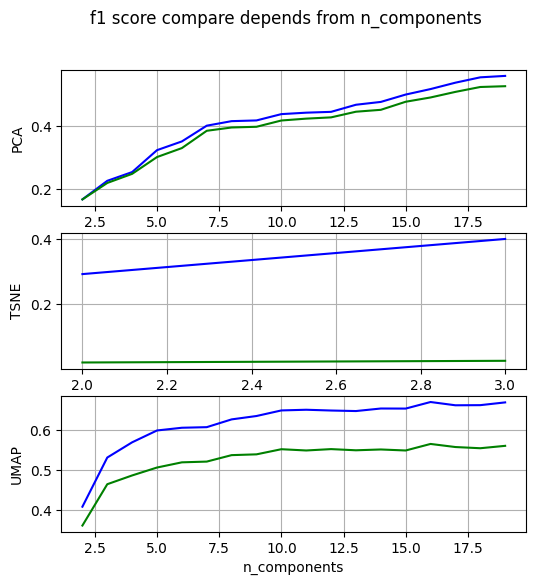

In [229]:
# нарисуем показател f1-score в зависимости от количества компонент и методов уменьшения размерности
import matplotlib.pyplot as plt
import seaborn as sns
columns_list = ['n_components', 'method', 'f1_train', 'f1_test']
methods_list = ['PCA', 'TSNE', 'UMAP']
fig, ax = plt.subplots(nrows=len(columns_list)-1, ncols=1, figsize=(6, 6))
fig.suptitle('f1 score compare depends from n_components')
for i, method in enumerate(methods_list):
    ax[i].plot(df_scores['n_components'][df_scores['method']==method], df_scores['f1_train'][df_scores['method']==method], 'b-')
    ax[i].plot(df_scores['n_components'][df_scores['method']==method], df_scores['f1_test'][df_scores['method']==method], 'g-')
    ax[i].set_xlabel('n_components')
    ax[i].set_ylabel(method)
    ax[i].grid()
    # ax[i].set_xscale('log')
plt.show()

#### видим, что UMAP быстрее (начиная с 10 компонент) выходит на высокую точнось, но при этом точность на тестовом датасете сильно уступает точности на train, что может говорить о переобучении модели.

7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.

#### Выводы
при сравнении методов понижения размерности исходных данных (56121 колонок) на примере логистической регрессии выяснилось, что модель значительно ухудшает показатели:
1. при обучении модели на исходных данных с размерностью 56121 Логистическая регрессия показывает f1-score 83%
2. при понижении размерности до 2х компонент f1-score модели логистической регресси построенной на PCA=17%, TSNE=29%, UMAP=41%
3. при 19 признаках максимальный результат на тестовой выборке показывает модель с использованием UMAP (56%),
PCA=53%, но с учетом того, что UMAP переобучается и почти не растет, то **приоритетным для нас является использование PCA**, но с бОльшим количестовом параметров (>20)
#### Итоги: 
1. Таким образом мы можем утверждать, что снижение размерности можно использовать при необходимости, но при этом мы должны  быть готовы к понижению точности модели. На примере датасета fake_news.csv и логистической регресси понижение размерности с 56121 до 19, ухудшило F1-score модели с 83% до 53%. 
2. PCA оказался самым перспективным, т.к. при понижении размерности с 51к до 2к сохранил 75% информации и при размерности 20 на логистической регрессии имеет показатель f1-score = 53%
#### P.S.
Также хочу отметить, что времени на уменьшение размерности уходит больше(!), чем на обучение модели с большим количеством features. По-этому, в контексте этого исследования не вижу преимуществ в понижении размерности.